# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 14

## Problem 1a

First let's set things up for business. 

In [1]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

We are supposed to use  **ipmag.igrf()** to calculate the inclination values in Sicily at a latitude of 38$^{\circ}$ and  longitude of 14$^{\circ}$E from 1600 to 1945.  

In [3]:
help(ipmag.igrf)

Help on function igrf in module pmagpy.ipmag:

igrf(input_list, mod='', ghfile='')
    Determine Declination, Inclination and Intensity from the IGRF model.
    (http://www.ngdc.noaa.gov/IAGA/vmod/igrf.html)
    
    Parameters
    ----------
    input_list : list with format [Date, Altitude, Latitude, Longitude]
        date must be in decimal year format XXXX.XXXX (A.D.)
    mod :  desired model
        "" : Use the IGRF
        custom : use values supplied in ghfile
        or choose from this list
        ['arch3k','cals3k','pfm9k','hfm10k','cals10k.2','cals10k.1b']
        where:
            arch3k (Korte et al., 2009)
            cals3k (Korte and Constable, 2011)
            cals10k.1b (Korte et al., 2011)
            pfm9k  (Nilsson et al., 2014)
            hfm10k is the hfm.OL1.A1 of Constable et al. (2016)
            cals10k.2 (Constable et al., 2016)
            the first four of these models, are constrained to agree
            with gufm1 (Jackson et al., 2000) for the p

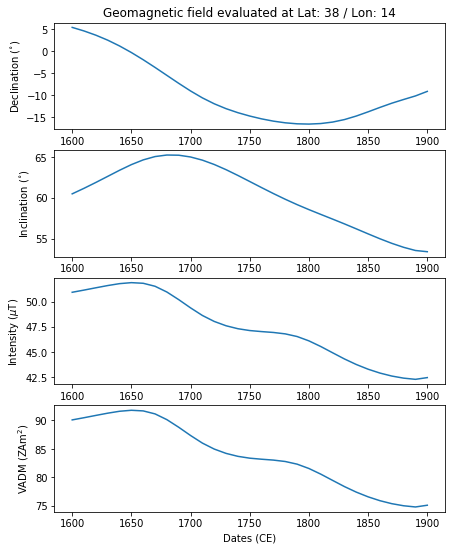

In [11]:
# make a list of desired dates
dates=range(1600,1910,10) # list of dates 10 year increments
mod = 'cals10k_2' # choose the  most recent model
lat,lon,alt=38,14,0 #  latitude, longitude and alitude for sicily
Vecs=[] # list for Dec,Inc,Int outputs
for date in dates: # step through the dates
    Vecs.append(ipmag.igrf([date,alt,lat,lon],mod=mod)) # append to list
vector_df = pd.DataFrame(Vecs)   # make it into a Pandas dataframe
vector_df.columns=['dec','inc','int']
vector_df['vadms']=pmag.b_vdm(vector_df.int.values*1e-9, lat) # calculate the VADMs
vector_df['dec_adj']=vector_df['dec'] 
vector_df.loc[vector_df.dec>180,['dec_adj']]=vector_df.dec-360 # adjust declinations to be -180 => 180
fig=plt.figure(1,figsize=(7,9)) # set up the figure
fig.add_subplot(411) # make 4 rows of plots, this is the first
plt.plot(dates,vector_df.dec_adj) # plot the adjusted declinations
plt.ylabel('Declination ($^{\circ}$)')
plt.title('Geomagnetic field evaluated at Lat: '+str(lat)+' / Lon: '+str(lon))
fig.add_subplot(412) # this is the second
plt.plot(dates,vector_df.inc) # plot  the inclinations
plt.ylabel('Inclination ($^{\circ}$)')
fig.add_subplot(413)
plt.plot(dates,vector_df.int*1e-3) # plot the intensites (in uT instead of nT)
plt.ylabel('Intensity ($\mu$T)')
fig.add_subplot(414) # plot the VADMs 
plt.plot(dates,vector_df.vadms*1e-21) # plot as ZAm^2
plt.ylabel('VADM (ZAm$^2$)')
plt.xlabel('Dates (CE)');


## Problem 1b

We need to read in the data from geomagia\_sel.txt.  Take  a peak and see that it is a comma delimited file with a header in the second line. We  read the data in with pandas. 

In [12]:
geomagia=pd.read_csv('Chapter_14/geomagia_sel.txt',header=1)
geomagia.head()

,Age[yr.AD],Sigma-ve[yr.],Sigma+ve[yr.],SigmaAgeID,N_Ba,n_Ba[meas.],n_Ba[acc.],Ba[microT],SigmaBa[microT],VDM[E22_AmE2],...,SpecTypeID,RefID,CompilationID,UploadMonth,UploadYear,Uploader,Editor,LastEditDate,C14ID,UID
0,1607,-9999,-9999,1,-999,-999,-999,-999.0,-999.0,-999.00,...,3,36,1005,-999,2009,Fabio Donadini,Maxwell Brown,24/07/2017,-1,857
1,1610,10,10,1,-999,-999,-999,-999.0,-999.0,-999.00,...,0,259,1001,-999,2009,Fabio Donadini,-999,-999,-1,5666
2,1610,-9999,-9999,1,1,-999,5,42.1,3.2,6.74,...,3,36,1001;1006;1010,-999,2007,Fabio Donadini,Maxwell Brown,24/07/2017,-1,858
3,1610,5,5,1,1,-999,4,40.5,8.1,-999.00,...,1,57,1001;1006;1010;1011,-999,2007,Fabio Donadini,-999,-999,-1,1403
4,1614,-9999,-9999,1,1,-999,5,40.8,3.2,-999.00,...,3,36,1001;1006;1010,-999,2007,Fabio Donadini,Maxwell Brown,24/07/2017,-1,836


In [13]:
geomagia_incs=geomagia[geomagia['Inc[deg.]']>-90]

In [14]:
geomagia_incs['Inc[deg.]']

0     62.8
1     60.0
2     65.1
5     65.0
6     61.5
7     61.6
9     61.4
10    57.5
11    62.2
12    57.3
13    60.7
14    62.5
15    60.4
17    61.8
18    63.3
19    64.0
20    65.4
21    64.1
22    57.7
23    54.2
24    54.2
25    56.6
26    58.3
28    56.1
29    57.9
31    53.2
32    54.8
35    55.7
37    51.5
38    52.0
42    50.5
43    49.8
44    49.8
46    51.7
48    51.3
50    50.7
51    49.0
52    51.6
53    52.3
56    50.9
59    49.0
Name: Inc[deg.], dtype: float64

Let's replot the GUFM data and decorate the plot with the geomagia data.

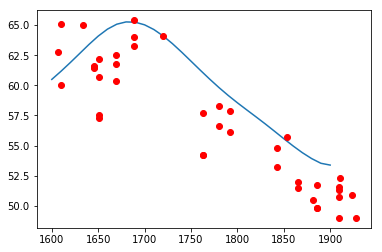

In [16]:
plt.plot(dates,vector_df.inc)
plt.plot(geomagia_incs['Age[yr.AD]'],geomagia_incs['Inc[deg.]'],'ro');

## Problem 1c

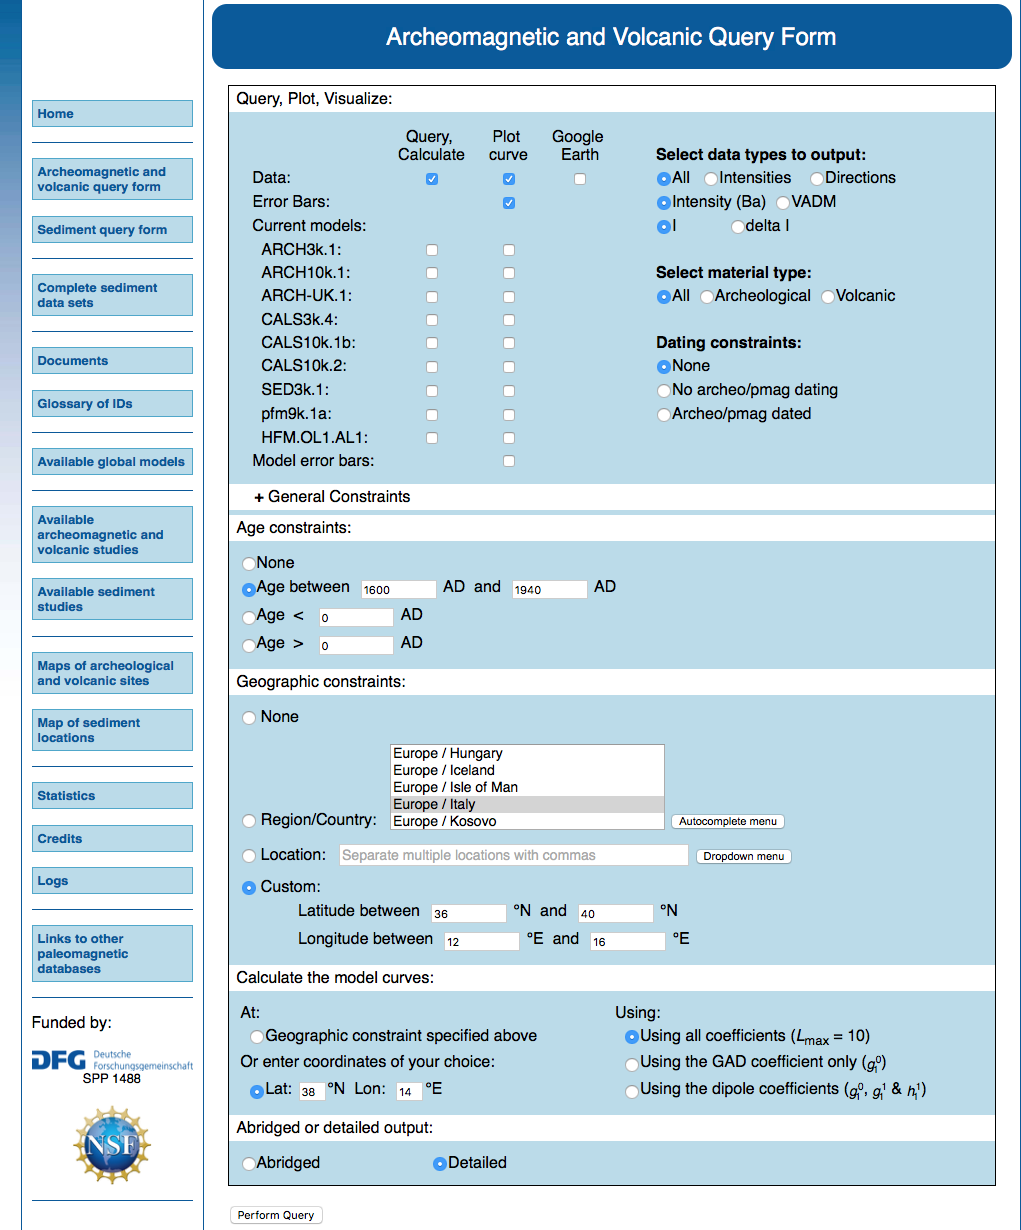

In [18]:
Image(filename="geomagia_screenshot.png")

I clicked on the 'Perform Query' button and scrolled down to the References part:  

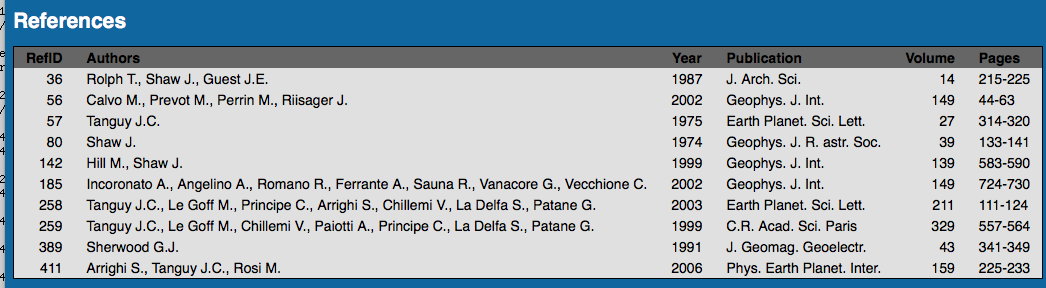

In [44]:
Image(filename="geomagia_refs.png")

Here is the original paper to see whether the samples were demagnetized properly, etc.  So I did that.  here is the pdf: 
http://ac.els-cdn.com/0305440387900082/1-s2.0-0305440387900082-main.pdf?_tid=6f840d8c-c90e-11e4-a1c8-00000aacb360&acdnat=1426202636_67453570f83c4126d6c152fbb69fd35d

The method used to determine the direction was AF demagnetization in 5mT steps to 50 mT (not very high) and averaged  the data from each specimen with Fisher statistics, apparently after looking at orthogonal plots to determine the stable portion of each demag experiment.   (This is of course not the way we do things nowadays.    One should use the principal component technique by Kirschvink (1980).)   After getting a direction from all the samples, they averaged data by flow, also using Fisher statistics.    

Any way, you get the idea.  This procedure would be done for each reference to really assess the data quality.  


Now let's do the equal area plot using the well worn **ipmag** functions (from Chapter 2).

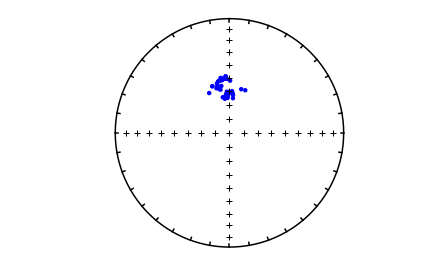

In [19]:
ipmag.plot_net(1) # make an equal angle net
ipmag.plot_di(geomagia_incs['Dec[deg.]'].values,geomagia_incs['Inc[deg.]'].values,color='blue') # put on the dots

So.. The data fall into two clumps.  Is this because of secular variation?  or is there tilting?  Or temporal aliasing?  Hmmm.  

## Problem 2a

To make this problem easier, I saved the PINT.xls as a text file.  We can read it in with read_csv and find out what the columns are:

In [4]:
pint=pd.read_excel('Chapter_14/PINT.xls')
pint.columns

Index(['Data', 'Ref', 'IDENT', 'SLAT', 'SLONG', 'AGE', 'DAGE', 'AgeMtd',
       'Continent', 'Country', 'IntM', 'P', 'Ndir', 'INC', 'DEC', 'k', 'a95',
       'Nint', 'F', 'DF', 'DF%', 'VDM/VADM', 'GROUP', 'TYPE', 'FORM',
       'ROCKMAG', 'COMMENTS', 'LOCATION NAME'],
      dtype='object')

Before we do anything else, let's clean out the records with no VDM/VADM data: 

In [5]:
pint=pint.dropna(subset=['VDM/VADM'])
pint['VDM/VADM'].head()

0    2.3
1    6.9
2    5.7
3    5.2
4    2.7
Name: VDM/VADM, dtype: float64

To filter by age, we use the 'AGE' column, and by method, the 'IntM' column. First let's do age:  

In [6]:
pint_last_10=pint[pint.AGE <10]
pint_last_10.AGE.head()

0    1.80
1    1.00
2    2.60
4    4.45
5    4.45
Name: AGE, dtype: float64

Now let's fish out the 'T+' and 'S' methods separately, starting with T+ (which means Thellier-Thellier plus pTRM checks).  

In [7]:
T_plus=pint_last_10[pint_last_10.IntM=='T+']
T_plus.IntM.unique()


array(['T+'], dtype=object)

OK that did it.  And now for the Shaw method data: 

In [8]:
Shaw=pint_last_10[pint_last_10.IntM=='S']
Shaw.IntM.unique()



array(['S'], dtype=object)

Now we can plot the two data sets versus age:

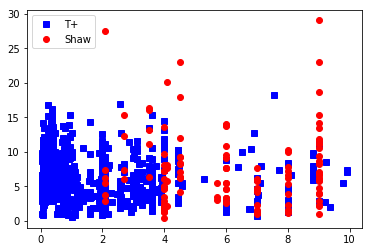

In [9]:

plt.plot(T_plus['AGE'],T_plus['VDM/VADM'],'bs',label='T+')
plt.plot(Shaw['AGE'],Shaw['VDM/VADM'],'ro',label='Shaw')
plt.legend();

The Shaw data seem to be more scattered with higher values for the same ages.... 

## Problem 2b

Now we look in the T+ data and separate them into three groups based on polarity.   

In [10]:
T_plus_trans=T_plus[T_plus.P=='T'] # pull out the transitional data
T_plus_norm=T_plus[T_plus.P=='N'] # the normal data
T_plus_rev=T_plus[T_plus.P=='R'] # the reverse data

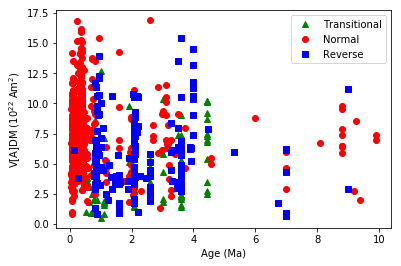

In [11]:
plt.plot(T_plus_trans['AGE'],T_plus_trans['VDM/VADM'],'g^',label='Transitional')
plt.plot(T_plus_norm['AGE'],T_plus_norm['VDM/VADM'],'ro',label='Normal')
plt.plot(T_plus_rev['AGE'],T_plus_rev['VDM/VADM'],'bs',label='Reverse')
plt.xlabel('Age (Ma)')
plt.ylabel('V[A]DM (10$^{22}$ Am$^2$)') 
plt.legend();

Very interesting.  The 'transitional' data are maybe lower in general, but there are a lot of high values.  The highest values are all normal, but I'm not sure if there is a big difference.  

## Problem 3a

I went to the website for the paper Lawrence et al. (2009) here: http://earthref.org/MagIC/doi/10.1029/2008GC002072
and clicked on the icon under the heading 'Download'. This downloaded a text file which I can unpack with **ipmag.download_magic**.



In [12]:
help(ipmag.download_magic)

Help on function download_magic in module pmagpy.ipmag:

download_magic(infile, dir_path='.', input_dir_path='.', overwrite=False, print_progress=True, data_model=3.0, separate_locs=False)
    takes the name of a text file downloaded from the MagIC database and
    unpacks it into magic-formatted files. by default, download_magic assumes
    that you are doing everything in your current directory. if not, you may
    provide optional arguments dir_path (where you want the results to go) and
    input_dir_path (where the downloaded file is).
    
    Parameters
    ----------
    infile : str
        MagIC-format file to unpack
    dir_path : str
        output directory (default ".")
    input_dir : str
        input directory (default ".")
    overwrite: bool
        overwrite current directory (default False)
    print_progress: bool
        verbose output (default True)
    data_model : float
        MagIC data model 2.5 or 3 (default 3)
    separate_locs : bool
        create a sep

In [13]:
ipmag.download_magic('magic_contribution_13436.txt',input_dir_path='Chapter_14/Problem_3',\
                     dir_path='Chapter_14/Problem_3')

working on:  'contribution'
1  records written to file  Chapter_14/Problem_3/contribution.txt
contribution  data put in  Chapter_14/Problem_3/contribution.txt
working on:  'locations'
5  records written to file  Chapter_14/Problem_3/locations.txt
locations  data put in  Chapter_14/Problem_3/locations.txt
working on:  'sites'
387  records written to file  Chapter_14/Problem_3/sites.txt
sites  data put in  Chapter_14/Problem_3/sites.txt
working on:  'samples'
1418  records written to file  Chapter_14/Problem_3/samples.txt
samples  data put in  Chapter_14/Problem_3/samples.txt
working on:  'specimens'
1374  records written to file  Chapter_14/Problem_3/specimens.txt
specimens  data put in  Chapter_14/Problem_3/specimens.txt
working on:  'measurements'
25470  records written to file  Chapter_14/Problem_3/measurements.txt
measurements  data put in  Chapter_14/Problem_3/measurements.txt
working on:  'criteria'
24  records written to file  Chapter_14/Problem_3/criteria.txt
criteria  data put 

True

## Problem 3b

Now I want to read in the data from the **sites.txt** file.  From the documentation in **\_PmagPy\_cb.ipynb**, I know that MagIC files are tab delimited and the column names are in the second line, so this should do the trick:


In [14]:
site_means=pd.read_csv('Chapter_14/Problem_3/sites.txt','\t',header=1)
site_means.head()

,age,age_sigma,age_unit,analysts,citations,criteria,description,dir_alpha95,dir_comp_name,dir_dec,...,vadm_n_samples,vadm_sigma,vdm,vdm_n_samples,vdm_sigma,vgp_dm,vgp_dp,vgp_lat,vgp_lon,vgp_n_samples
0,1.18,0.005,Ma,Lisa Tauxe,This study,DE-SPEC,"Trachyte flow, N flank Observation hill, Hut P...",4.2,A,258.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.18,0.005,Ma,Lisa Tauxe,This study,IE-SPEC,"Trachyte flow, N flank Observation hill, Hut P...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.18,0.005,Ma,Kristin Lawrence,This study,DE-SITE,"Trachyte flow, N flank Observation hill, Hut P...",4.2,NaN,258.6,...,NaN,NaN,NaN,NaN,NaN,4.5,8.1,-67.3,95.2,7.0
3,0.33,0.010,Ma,Lisa Tauxe,This study,DE-SPEC,"Upper basalt flow, S. flank Crater Hill, Hut P...",2.1,A,328.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.33,0.010,Ma,Kristin Lawrence,This study,DE-SITE,"Upper basalt flow, S. flank Crater Hill, Hut P...",2.1,NaN,328.6,...,NaN,NaN,NaN,NaN,NaN,2.5,4.1,79.0,101.2,6.0


To plot them, I first fish out the directions that are not blank (some of the records are just intensity values). 

In [15]:
site_means=site_means.dropna(subset = ['dir_dec','dir_inc'])

Now plot the net with ipmag.plot_net  and the directions with ipmag.plot_di. But first I set up a figure object.  

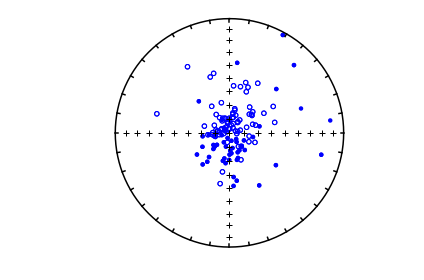

In [16]:
plt.figure(num=1)
ipmag.plot_net(1)
ipmag.plot_di(site_means['dir_dec'].values,site_means['dir_inc'].values,color='blue')

Now for the VGPs from the same records (vgp\_lat and vgp\_lon are the keys).  First we have to  drop the records without VGPs.  

In [26]:
site_means=site_means.dropna(subset=['vgp_lat','vgp_lon'])

And then take the antipodes of the reverse VGPs using **pmag.flip()**. 

In [27]:
help(pmag.flip)

Help on function flip in module pmagpy.pmag:

flip(di_block, combine=False)
    determines principle direction and calculates the antipode of
    the reverse mode
    Parameters
    ___________
    di_block : nested list of directions
    Return
    D1 : normal mode
    D2 : flipped reverse mode as two DI blocks
    combine : if True return combined D1, D2, nested D,I pairs



In [33]:
# need to make a nested array of values
vgp_block=site_means[['vgp_lon','vgp_lat']].values
norm_vgps,rev_vgps=pmag.flip(vgp_block)


In [34]:
help(ipmag.plot_vgp)

Help on function plot_vgp in module pmagpy.ipmag:

plot_vgp(map_axis, vgp_lon=None, vgp_lat=None, di_block=None, label='', color='k', marker='o', edge='black', markersize=20, legend=False)
    This function plots a paleomagnetic pole position on a cartopy map axis.
    
    Before this function is called, a plot needs to be initialized with code
    such as that in the make_orthographic_map function.
    
    Example
    -------
    >>> vgps = fishrot(dec=200,inc=30)
    >>> map_axis = make_orthographic_map(central_longitude=200,central_latitude=30)
    >>> plot_vgp(map_axis,vgp_lon=vgp_lon_list,vgp_lat=vgp_lat_list,color='red',markersize=40)
    
    Required Parameters
    -----------
    map_axis : the name of the current map axis that has been developed using cartopy
    plon : the longitude of the paleomagnetic pole being plotted (in degrees E)
    plat : the latitude of the paleomagnetic pole being plotted (in degrees)
    
    Optional Parameters (defaults are used if not specif

Let's have fun with **ipmag.plot_vgp( )**.  There are two ways to do maps in Python, the old way,  **matplotlib**'s **Basemap** module, and the new **cartopy** way.  We are shifting to **cartopy**, but there is also the **basemap** way if you have it installed and prefer it.  

**ipmag.plot_vgp( )** help page will walk us through this.  

In [35]:
help(ipmag.plot_vgp)

Help on function plot_vgp in module pmagpy.ipmag:

plot_vgp(map_axis, vgp_lon=None, vgp_lat=None, di_block=None, label='', color='k', marker='o', edge='black', markersize=20, legend=False)
    This function plots a paleomagnetic pole position on a cartopy map axis.
    
    Before this function is called, a plot needs to be initialized with code
    such as that in the make_orthographic_map function.
    
    Example
    -------
    >>> vgps = fishrot(dec=200,inc=30)
    >>> map_axis = make_orthographic_map(central_longitude=200,central_latitude=30)
    >>> plot_vgp(map_axis,vgp_lon=vgp_lon_list,vgp_lat=vgp_lat_list,color='red',markersize=40)
    
    Required Parameters
    -----------
    map_axis : the name of the current map axis that has been developed using cartopy
    plon : the longitude of the paleomagnetic pole being plotted (in degrees E)
    plat : the latitude of the paleomagnetic pole being plotted (in degrees)
    
    Optional Parameters (defaults are used if not specif

In [36]:
has_basemap, Basemap = pmag.import_basemap()
has_cartopy, Cartopy = pmag.import_cartopy()


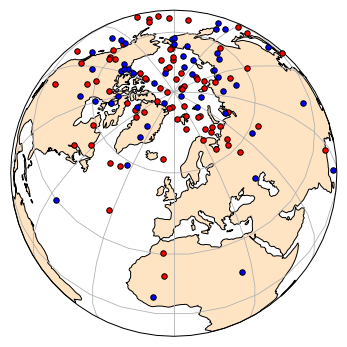

In [38]:
if not has_cartopy:
    print('You will need to correctly install cartopy in order to continue this cell')
else:
    map_axis =ipmag.make_orthographic_map(central_latitude=60,figsize=(6,6),land_color='bisque')
    ipmag.plot_vgp(map_axis, di_block=norm_vgps, color='red',\
                   markersize=30, legend='no')   
    ipmag.plot_vgp(map_axis, di_block=rev_vgps, color='blue',\
                   markersize=30, legend='no')  
    


In [ ]:
if not has_basemap:
    print('You will need to correctly install basemap in order to continue this cell')
else:
    m=Basemap(projection='ortho',lat_0=70,lon_0=230,resolution='c')
    plt.figure(num=1,figsize=(6,6))
    m.drawcoastlines()
    m.fillcontinents(color='bisque')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-60,90,30))
    ipmag.plot_vgp_basemap(m,di_block=norm_vgps, color='r',label='normal VGPs')
    ipmag.plot_vgp_basemap(m,di_block=rev_flipped, color='b',label='reverse VGPs')

## Problem 3c

Here we calculate the VGP scatter.  We need now to have a single nested array for the normal and the reverse antipodes and then a function to calculate S.  

In [69]:
Antarctic_combo=np.array(pmag.flip(vgp_block,combine=True)).transpose()

In [70]:
def Scalc(vgps):
    N=len(vgps[1])
    colats=90.-vgps[1]
    Sp2=np.sum(colats**2)/(N-1.)
    return '%7.1f'%(np.sqrt(Sp2))

    

In [71]:
print (Scalc(Antarctic_combo))

   33.0


## Problem 3d


In [52]:
def Scalc_w_cutoff(vgps,c):
    N=len(vgps[1])
    colats=90.-vgps[1]
    Good=[]
    for i in range(N):
        if colats[i]<c:Good.append(colats[i])
    sel_colats=np.array(Good)
    Sp2=np.sum(sel_colats**2)/(N-1.)
    return '%7.1f'%(np.sqrt(Sp2))

In [72]:
for c in range(90,20,-5):
    print (c,Scalc_w_cutoff(Antarctic_combo,c))

90    32.0
85    32.0
80    30.4
75    29.6
70    28.9
65    27.6
60    26.5
55    26.0
50    23.1
45    22.0
40    19.0
35    17.6
30    13.5
25    11.6


Well the values of Sp with different cutoff values just look arbitrary to me.  How am I supposed to know what the cutoff should be? Seems like that question puts the cart before the horse. 

## Problem 3e

Ok.  now we repeat this with the data in Chapter_14/hawaii.txt

In [73]:
hw_site_means=pd.read_csv('Chapter_14/Problem_3/hawaii.txt','\t',header=0)
hw_site_means.head()

,age,age_pm,age_high,age_low,site_lat,site_lon,model_lat,model_lon,plate,nn,...,dec,inc,model_vgp_lat,model_vgp_lon,site,site_ID,location,psv10_location,reference,magic_method_code
0,0.184,0.003,999.0,999.0,20.075,204.150,20.021704,204.257442,PA,5,...,340.9,34.3,72.0,113.7,HW01,38,Hawaii,"Hawaii, USA",Brassert97,GM-KAR:LP-DC4:LP-DIR-T:LP-PI-ALT-PTRM:LP-PI-TR...
1,0.181,0.003,999.0,999.0,20.104,204.125,20.051574,204.230699,PA,8,...,343.9,31.8,74.5,106.4,HW02,39,Hawaii,"Hawaii, USA",Brassert97,GM-KAR:LP-DC4:LP-DIR-T:LP-PI-ALT-PTRM:LP-PI-TR...
2,0.254,0.012,999.0,999.0,20.117,204.121,20.043429,204.269321,PA,12,...,3.7,55.4,73.8,215.1,HW03,40,Hawaii,"Hawaii, USA",Brassert97,GM-KAR:LP-DC4:LP-DIR-T:LP-PI-ALT-PTRM:LP-PI-TR...
3,0.153,0.003,999.0,999.0,20.142,204.117,20.097684,204.206353,PA,14,...,6.4,32.7,83.5,314.0,HW04,41,Hawaii,"Hawaii, USA",Brassert97,GM-KAR:LP-DC4:LP-DIR-T:LP-PI-ALT-PTRM:LP-PI-TR...
4,0.382,0.016,999.0,999.0,20.150,204.105,20.039354,204.328050,PA,6,...,350.2,21.9,77.2,73.2,HW05,42,Hawaii,"Hawaii, USA",Brassert97,GM-KAR:LP-DC4:LP-DIR-T


It looks like the columns we want are model_vgp_lon and model_vgp_lat.  Here's another way to flip the reverse VGPs

In [74]:
vgp_block=hw_site_means[['model_vgp_lon','model_vgp_lat']].values
hawaii_combo=np.array(pmag.flip(vgp_block,combine=True)).transpose()
print (Scalc(hawaii_combo))


   14.2


Wow. so there is a BIG latitudinal dependence.  Now let's calculate Model G for the latitudes at Hawaii and Antarctica.

In [75]:
def ModelG(lat):
    a,b=0.26,11.9
    S2=(a*lat)**2+b**2
    return np.sqrt(S2)

In [76]:
antarctica_lat=np.average(site_means['lat'])
hawaii_lat=np.average(hw_site_means['model_lat'])
print (antarctica_lat,ModelG(antarctica_lat))
print (hawaii_lat,ModelG(hawaii_lat))

-77.9418816794 23.5005475633
20.6104438681 13.0508938697


So the values we get are much larger than Model G.  But what about using a cutoff of, say 45$^{\circ}$?

In [77]:
print (Scalc_w_cutoff(Antarctic_combo,45))
print (Scalc_w_cutoff(hawaii_combo,45))

   22.0
   13.2


So, Model G works well for data with a 45$^{\circ}$ cutoff.  And now just to show off:

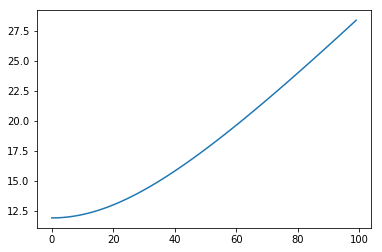

In [78]:
lats=range(100)
Ss=[]
for lat in lats:
    Ss.append(ModelG(lat))
plt.plot(lats,Ss);

## Problem 4a:

First we we will generate 100 directions from the function **ipmag.tk03()** at a latitude of 20$^{\circ}$.

In [79]:
help(ipmag.tk03)

Help on function tk03 in module pmagpy.ipmag:

tk03(n=100, dec=0, lat=0, rev='no', G2=0, G3=0)
    Generates vectors drawn from the TK03.gad model of secular
    variation (Tauxe and Kent, 2004) at given latitude and rotated
    about a vertical axis by the given declination. Return a nested list of
    of [dec,inc,intensity].
    
    Parameters
    ----------
    n : number of vectors to determine (default is 100)
    dec : mean declination of data set (default is 0)
    lat : latitude at which secular variation is simulated (default is 0)
    rev : if reversals are to be included this should be 'yes' (default is 'no')
    G2 : specify average g_2^0 fraction (default is 0)
    G3 : specify average g_3^0 fraction (default is 0)
    
    Returns
    ----------
    tk_03_output : a nested list of declination, inclination, and intensity (in nT)
    
    Examples
    --------
    >>> ipmag.tk03(n=5, dec=0, lat=0)
    [[14.752502674158681, -36.189370642603834, 16584.848620957589],
     [9.

In [88]:
hawaii_tk03=np.array(ipmag.tk03(lat=20)) # get a nested array of vectors

In [89]:
decs=hawaii_tk03.transpose()[0]
incs=hawaii_tk03.transpose()[1]

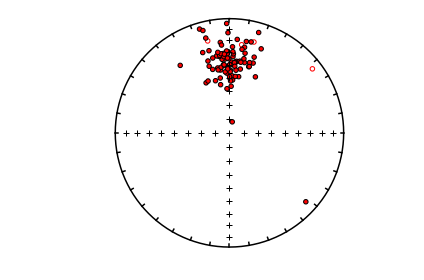

In [90]:
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,color='red',edge='black')

## Problem 4b:

Let's find the IGRF value at lat=20, lon=-156.

In [84]:
d,i,f=ipmag.igrf([2010,0,20,-156])
print (d,i)

9.75366583461 36.6001896139


Now let's find the GAD inclination at this latitude with pmag.pinc

In [96]:
GAD_inc=pmag.pinc(20)
print (GAD_inc)

36.0523887324


and rotate the hawaii.tk03 data to this expected GAD direction using **pmag.dodirot_V**

In [91]:
help(pmag.dodirot_V)

Help on function dodirot_V in module pmagpy.pmag:

dodirot_V(di_block, Dbar, Ibar)
    Rotate an array of dec/inc pairs to coordinate system with Dec,Inc as 0,90
    
    Parameters
    ___________________
    di_block : array of [[Dec1,Inc1],[Dec2,Inc2],....]
    Dbar : declination of desired center
    Ibar : inclination of desired center
    
    Returns
    __________
    array of rotated decs and incs: [[rot_Dec1,rot_Inc1],[rot_Dec2,rot_Inc2],....]



In [94]:
tk03_DIs=np.column_stack((decs,incs))

In [97]:
tk03_rot=pmag.dodirot_V(tk03_DIs,0,GAD_inc)

And plot them.

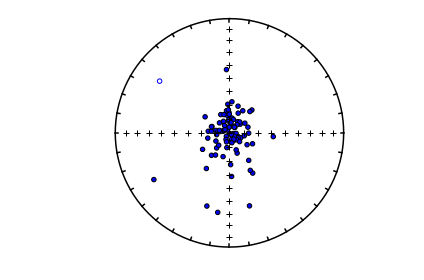

In [99]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=tk03_rot,color='blue',edge='black')

Now we do the same for the Hawaiian data we extracted from hawaii.txt.  But first we have to save them to a file. 

In [105]:
hw_DIs=hw_site_means[['dec','inc']].values
hw_rot=pmag.dodirot_V(hw_DIs,0,GAD_inc)

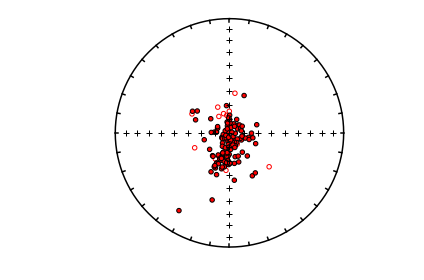

In [106]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=hw_rot,color='red',edge='black')

The data from Hawaii are dual polarity and apparantly have a different mean direction from the GAD field.  They also look stretched in a weird way and I'm beginning to think that some part of Hawaii is tilted....   Maybe a project for someone in here. 

## Problem 4c

And now let's calculate the eigenparameters for the Hawaii data set. 

In [107]:
help(pmag.doprinc)

Help on function doprinc in module pmagpy.pmag:

doprinc(data)
    Gets principal components from data in form of a list of [dec,inc] data.
    
    Parameters
    ----------
    data : nested list of dec, inc directions
    
    Returns
    -------
    ppars : dictionary with the principal components
        dec : principal directiion declination
        inc : principal direction inclination
        V2dec : intermediate eigenvector declination
        V2inc : intermediate eigenvector inclination
        V3dec : minor eigenvector declination
        V3inc : minor eigenvector inclination
        tau1 : major eigenvalue
        tau2 : intermediate eigenvalue
        tau3 : minor eigenvalue
        N  : number of points
        Edir : elongation direction [dec, inc, length]



In [108]:
pmag.doprinc(hw_DIs)

{'Edir': array([ 17.53802414, -61.10216863,   1.        ]),
 'N': 158,
 'V2dec': 197.53802413631615,
 'V2inc': 61.102168629228665,
 'V3dec': 94.288246761741107,
 'V3inc': 7.2102992487544944,
 'dec': 0.46072429039185048,
 'inc': 27.818063113854485,
 'tau1': 0.93040441152085152,
 'tau2': 0.048142100747347566,
 'tau3': 0.021453487731800846}

And bingo!  The average inclination is about 28$^{\circ}$, not 36!  This is what you would get if there is a non-zero g$^0_2$ term. 